In [1]:
from games.tic_tac_toe import TicTacToe
from networks.tic_tac_toe_net import create_network

from lib.model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/trained/network_tic_tac_toe.h5")

2022-03-14 11:05:05.013875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-14 11:05:05.044948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-14 11:05:05.045207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-14 11:05:05.045726: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 1)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 512)    1024        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 512)   2048        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 512)    0           ['batch_normaliza

In [3]:
state = game.get_init_state()
model.predict(game.get_canonical_form(state))

2022-03-14 11:05:10.671910: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([0.5218167 , 0.03335869, 0.02699003, 0.02978221, 0.26231188,
        0.03275809, 0.03000484, 0.03282708, 0.03015047], dtype=float32),
 0.50251716)

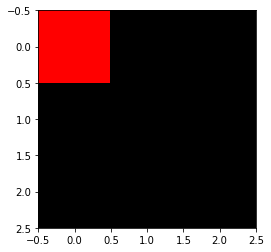

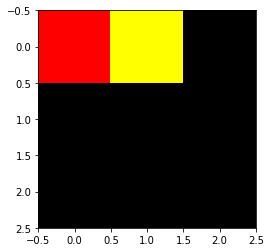

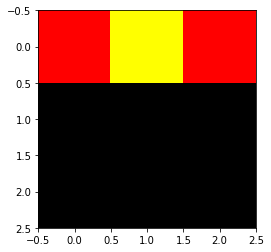

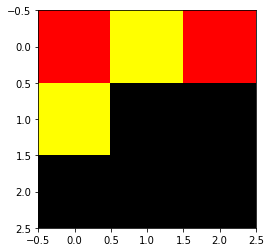

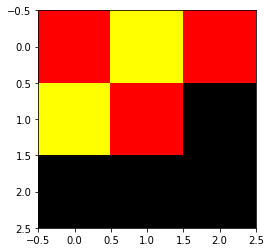

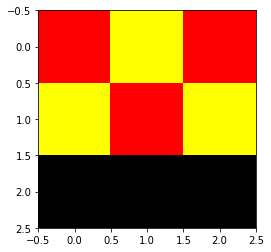

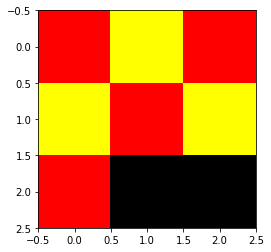

In [4]:
state = game.get_init_state()
game.play_vs_bot(model, Model(create_network(game.shape, game.nb_actions)), state, 1)

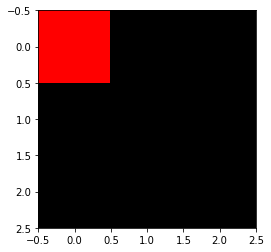

Model prediction: (array([0.5218167 , 0.03335869, 0.02699003, 0.02978221, 0.26231188,
       0.03275809, 0.03000484, 0.03282708, 0.03015047], dtype=float32), 0.50251716)
Root value: 0.8283367183804512


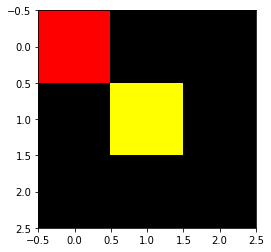

Model prediction: (array([0.00134804, 0.03923529, 0.13262658, 0.04181836, 0.2659865 ,
       0.0366809 , 0.04502817, 0.04422208, 0.39305404], dtype=float32), -0.5998893)


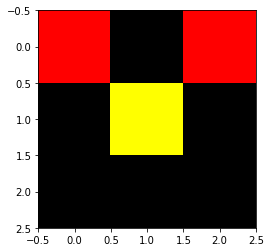

Model prediction: (array([0.00358074, 0.13055411, 0.71610844, 0.00171472, 0.00185572,
       0.00347574, 0.134782  , 0.00405146, 0.00387701], dtype=float32), 0.6944918)
Root value: 0.9775499933958054


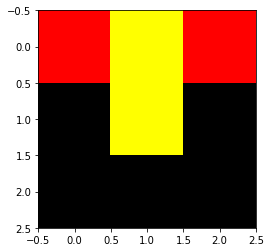

Model prediction: (array([0.00222736, 0.03923229, 0.00432365, 0.05149321, 0.00347407,
       0.03675297, 0.31939504, 0.08148526, 0.4616161 ], dtype=float32), -0.8185801)


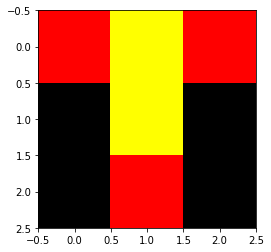

Model prediction: (array([1.2951346e-06, 5.1651788e-03, 1.3910842e-02, 5.6965571e-05,
       3.4477437e-04, 3.4259312e-05, 9.2286128e-01, 6.5949848e-06,
       5.7618868e-02], dtype=float32), 0.9998586)
Root value: -0.18252998553216457


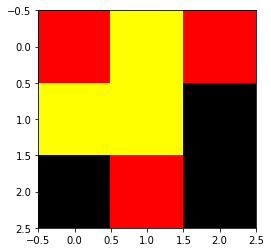

Model prediction: (array([5.4023900e-07, 9.6974873e-06, 1.8059138e-09, 6.5518186e-08,
       1.1790956e-09, 5.3186213e-06, 9.9587268e-01, 1.6454312e-07,
       4.1114786e-03], dtype=float32), -0.9595058)


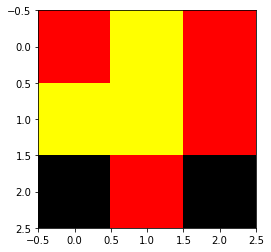

Model prediction: (array([1.1014200e-09, 2.9401158e-07, 1.4372288e-10, 1.3206645e-07,
       2.8613354e-07, 5.3746860e-02, 9.4625157e-01, 1.8658044e-09,
       9.5415771e-07], dtype=float32), -0.8985822)
Root value: -0.10854889795184136


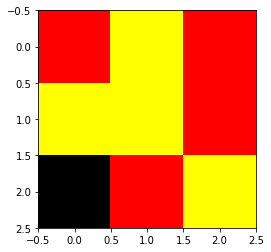

Model prediction: (array([1.2812846e-02, 4.4797090e-04, 7.6370727e-04, 1.7865443e-05,
       2.4896458e-04, 1.3737131e-03, 4.4456047e-01, 1.7604209e-01,
       3.6373240e-01], dtype=float32), 0.6257957)


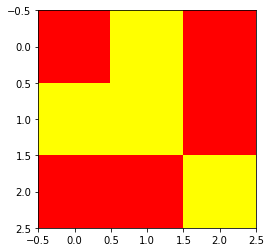

Model prediction: (array([5.1502581e-04, 1.2213597e-03, 1.1346897e-05, 4.3332690e-05,
       1.5963636e-04, 1.2276370e-04, 9.9783260e-01, 5.6997505e-05,
       3.6998652e-05], dtype=float32), 0.7094368)
Root value: 0.0


In [6]:
state = game.get_init_state()
#state = game.get_new_state(state, 4)
#state = game.get_new_state(state, 3)
game.play_vs(model, state, 50)